In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict, KFold
import matplotlib.pyplot as plt

In [2]:
url = "https://archive.ics.uci.edu/static/public/468/data.csv"

df = pd.read_csv(url)
df.replace ('?', pd.NA, inplace=True)
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
print("Null Data: ")
print(df.isnull().sum())

Null Data: 
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [5]:
le = LabelEncoder()
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [6]:
df["VisitorType"] = le.fit_transform(df["VisitorType"])
df["Weekend"] = le.fit_transform(df["Weekend"])
df["Revenue"] = le.fit_transform(df["Revenue"])
df["Month"] = le.fit_transform(df["Month"])

df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


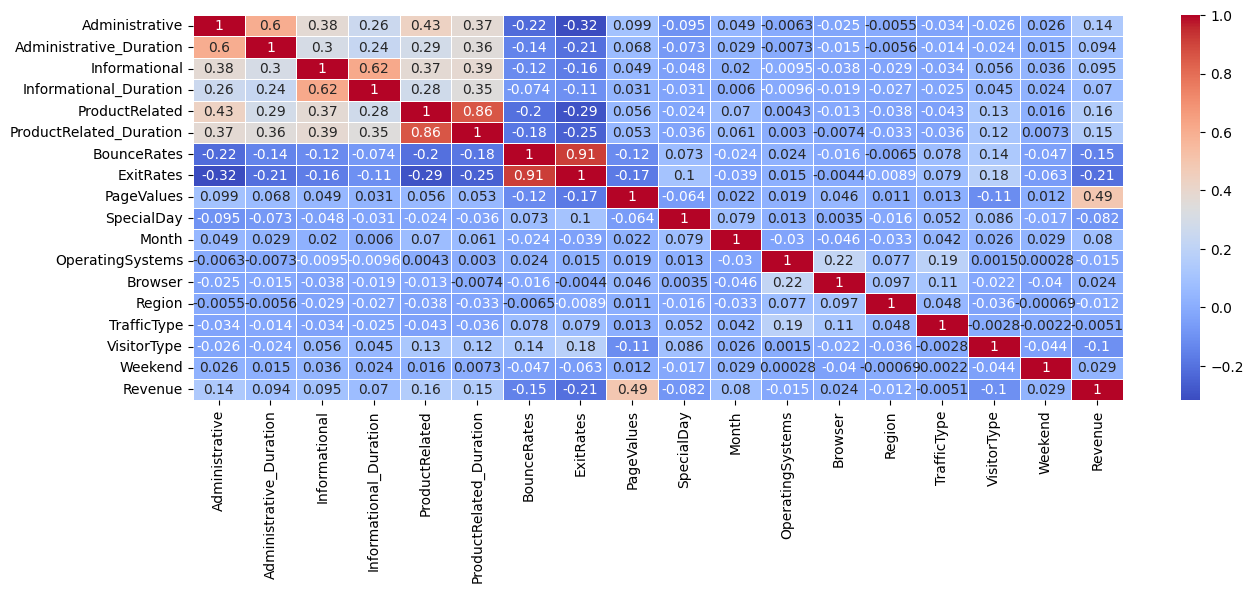

In [7]:
plt.figure(figsize = (15,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidth=0.5)

plt.show()

In [8]:
print(df["VisitorType"].value_counts())
print(df["Weekend"].value_counts())
print(df["Revenue"].value_counts())

VisitorType
2    10551
0     1694
1       85
Name: count, dtype: int64
Weekend
0    9462
1    2868
Name: count, dtype: int64
Revenue
0    10422
1     1908
Name: count, dtype: int64


In [9]:
# Split X/y

X = df.drop(["Revenue"], axis=1)
y = df["Revenue"]

Revenue
0    10422
1     1908
Name: count, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


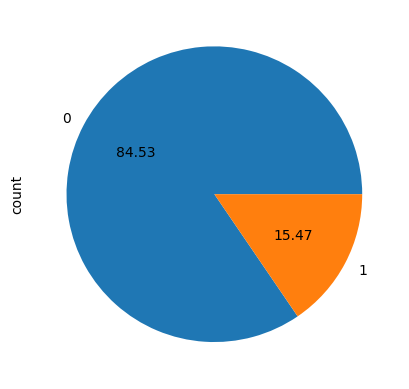

In [10]:
# Cek Imbalance Data

print(y.value_counts())
print(y.value_counts().plot.pie(autopct="%.2f"))

Revenue
0    1908
1    1908
Name: count, dtype: int64


Text(0.5, 1.0, 'Under-sampling')

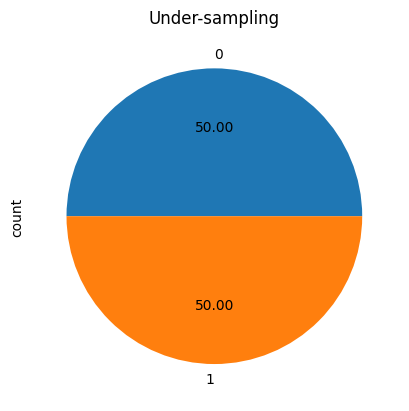

In [11]:
rus = RandomUnderSampler(sampling_strategy=1)

X, y = rus.fit_resample(X, y)

print(y.value_counts())
ax = y.value_counts().plot.pie(autopct="%.2f")
ax.set_title("Under-sampling")

Random Forest

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Random Forest tanpa K-Fold CrossVal
ran = RandomForestClassifier(n_estimators= 300, random_state=100)
ran.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [15]:
y_predran = ran.predict(X_test)
print("F1 Score Micro: ", f1_score(y_test, y_predran, average="micro"))
print("F1 Score Macro: ", f1_score(y_test, y_predran, average="macro"))
print("F1 Score Weighted: ", f1_score(y_test, y_predran, average="weighted"))
print("Accuracyy score random forest: ", ran.score(X_test, y_test))

F1 Score Micro:  0.8586387434554974
F1 Score Macro:  0.8585912596401029
F1 Score Weighted:  0.858659093662095
Accuracyy score random forest:  0.8586387434554974


In [16]:
# Random Forest dengan K-Fold CrossVal
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_predran_kf = cross_val_predict(ran, X, y, cv=5)
print("F1 Score Micro: ", f1_score(y, y_predran_kf, average="micro"))

F1 Score Micro:  0.8393605870020965


KNN

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11 )

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
# KNN tanpa K-Fold CrossVal
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_predknn = knn.predict(X_test)
print("F1 Score Micro: ", f1_score(y_test, y_predknn, average="micro"))
print("F1 Score Macro: ", f1_score(y_test, y_predknn, average="macro"))
print("F1 Score Weighted: ", f1_score(y_test, y_predknn, average="weighted"))
print("Accuracyy score KNN: ", knn.score(X_test, y_test))

F1 Score Micro:  0.7342931937172775
F1 Score Macro:  0.7342890967247857
F1 Score Weighted:  0.7342617834415072
Accuracyy score KNN:  0.7342931937172775


In [21]:
#KNN dengan K-Fold CrossVal
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_predknn_kf = cross_val_predict(knn, X, y, cv=5)
print("F1 Score Micro: ", f1_score(y, y_predknn_kf, average="micro"))

F1 Score Micro:  0.7175052410901468


SVM

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
# SVM tanpa K-Fold CrossVal
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [25]:
y_predsvm = svm.predict(X_test)
print("F1 Score Micro: ", f1_score(y_test, y_predsvm, average="micro"))
print("F1 Score Macro: ", f1_score(y_test, y_predsvm, average="macro"))
print("F1 Score Weighted: ", f1_score(y_test, y_predsvm, average="weighted"))
print("Accuracyy score SVM: ", svm.score(X_test, y_test))

F1 Score Micro:  0.81282722513089
F1 Score Macro:  0.812518554746154
F1 Score Weighted:  0.8123194125624532
Accuracyy score SVM:  0.81282722513089


In [26]:
# SVM dengan K-Fold CrossVal
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_predsvm_kf = cross_val_predict(svm, X, y, cv=5)
print("F1 Score Micro: ", f1_score(y, y_predsvm_kf, average="micro"))

F1 Score Micro:  0.6629979035639413
